# Exercises on Sequence Mining

In [1]:
import re
import numpy as np
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import tabulate

import sys
sys.path.append('../utilities')
from utilities.load_data import load_dblp_citations, load_city_tour

## Exercise 1 - Min-hashing

Consider the following matrix:

<table bgcolor="navajowhite" border="5">
<tbody><tr>
<th> </th>
<th>C1</th>
<th>C2</th>
<th>C3</th>
<th>C4</th>
</tr>
<tr>
<td>R1</td>
<td>0</td>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>R2</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>
<tr>
<td>R3</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>R4</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>R5</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>R6</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
</tbody></table>

1. Compute the min-hashing value of each of the rows with the permutation: R4, R6, R1, R3, R5, R2. Which of the following statements are true? _Note:_ we give the minhash value in terms of the original name of the row, rather than the order of the row in the permutation.

 - The minhash value for C1 is R5
 - The minhash value for C4 is R2
 - The minhash value for C1 is R2
 - The minhash value for C2 is R1

2. Given a data matrix and a permutation return the min-hashing values for each of the columns. 

1.
The first one is right

In [2]:
data = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 0, 1],
    [0, 0, 1, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 0],
])

permutation = np.array([3,5,0,2,4,1])

def signature(data, permutation):
    sign = np.full(np.shape(data)[1], None)
    
    ### YOUR CODE HERE
    permutation_matrix = data[permutation, :]
    print(permutation_matrix)

    for i in range(np.shape(data)[1]):
        idx = np.nonzero(permutation_matrix[:,i])[0][0]
        sign[i] = permutation[idx]
    ### YOUR CODE HERE
    return sign

sign = signature(data, permutation)

print(sign, "\n")

print("The minhash value for C1 is R5: {0}".format(int(sign[0] == 4)))
print("The minhash value for C4 is R2: {0}".format(int(sign[3] == 1)))
print("The minhash value for C1 is R2: {0}".format(int(sign[0] == 1)))
print("The minhash value for C2 is R1: {0}".format(int(sign[1] == 0)))

[[0 0 1 0]
 [0 1 0 0]
 [0 1 1 0]
 [0 1 0 1]
 [1 0 1 0]
 [1 0 1 1]]
[4 5 3 2] 

The minhash value for C1 is R5: 1
The minhash value for C4 is R2: 0
The minhash value for C1 is R2: 0
The minhash value for C2 is R1: 0


### Exercise 2 - Locality Sentity Hashing

Here is a matrix representing the signatures of seven columns, C1 through C7.

<table bgcolor="floralwhite" border="5">
<tbody><tr>
<th>C1 </th>
<th>C2 </th>
<th>C3 </th>
<th>C4 </th>
<th>C5 </th>
<th>C6 </th>
<th>C7 </th>
</tr>
<tr>
<td>1 </td>
<td>2 </td>
<td>1 </td>
<td>1 </td>
<td>2 </td>
<td>5 </td>
<td>4 </td>
</tr>
<tr>
<td>2 </td>
<td>3 </td>
<td>4 </td>
<td>2 </td>
<td>3 </td>
<td>2 </td>
<td>2 </td>
</tr>
<tr>
<td>3 </td>
<td>1 </td>
<td>2 </td>
<td>3 </td>
<td>1 </td>
<td>3 </td>
<td>2 </td>
</tr>
<tr>
<td>4 </td>
<td>1 </td>
<td>3 </td>
<td>1 </td>
<td>2 </td>
<td>4 </td>
<td>4 </td>
</tr>
<tr>
<td>5 </td>
<td>2 </td>
<td>5 </td>
<td>1 </td>
<td>1 </td>
<td>5 </td>
<td>1 </td>
</tr>
<tr>
<td>6 </td>
<td>1 </td>
<td>6 </td>
<td>4 </td>
<td>1 </td>
<td>1 </td>
<td>4 </td>
</tr>
</tbody></table>

Suppose we use locality-sensitive hashing with three bands of two rows each. Assume there are enough buckets available that the hash function for each band can be the identity function (i.e., columns hash to the same bucket if and only if they are identical in the band). Find all the candidate pairs, and then identify one of them in the list below.

 - C1 and C3
 - C1 and C2
 - C1 and C5
 - C5 and C6


The first one again

In [3]:
data = [
    [1, 2, 1, 1, 2, 5, 4],
    [2, 3, 4, 2, 3, 2, 2],
    [3, 1, 2, 3, 1, 3, 2],
    [4, 1, 3, 1, 2, 4, 4],
    [5, 2, 5, 1, 1, 5, 1],
    [6, 1, 6, 4, 1, 1, 4]
]

potential_pairs = []

### YOUR CODE HERE
for i in range(0,np.shape(data)[0],2):
    band = data[i:i+2]
    indicies = dict()
    for j in range(len(band[0])):
        key = (band[0][j],band[1][j])
        if key in indicies:
            indicies[key].append(j)
        else:
            indicies[key] = [j]
    for v in indicies.values():
        if len(v) > 1:
            potential_pairs.append(v)
### YOUR CODE HERE
                              
print(potential_pairs)


[[0, 3], [1, 4], [0, 5], [0, 2], [3, 6]]


### Exercise 3 - Shingling

Find the set of 2-shingles for the "document": **ABRACADABRA**
and also for the "document": **BRICABRAC**

Answer the following questions:

 - How many 2-shingles does ABRACADABRA have?
 - How many 2-shingles does BRICABRAC have?
 - How many 2-shingles do they have in common?
 - What is the Jaccard similarity between the two documents"?

Then, find the true statement in the list below:

 - BRICABRAC has 4 2-shingles.
 - The Jaccard similarity is 5/7.
 - ABRACADABRA has 7 2-shingles.
 - ABRACADABRA has 10 2-shingles.

In [4]:
doc1 = "ABRACADABRA"
doc2 = "BRICABRAC"

def find_shingles(doc, k=2):
    shingles = []

    ## YOUR CODE HERE
    for i in range(len(doc) - k + 1):
        shingles.append(doc[i: i + k])
    ## YOUR CODE HERE
    
    return shingles

def array_intersection(a, b):
    ## YOUR CODE HERE
    return list(set(a).intersection(set(b)))
    ## YOUR CODE HERE
        

def array_union(a, b):
    ## YOUR CODE HERE
    return list(set(a).union(set(b)))
    ## YOUR CODE HERE
    
doc1_2_shingles = find_shingles(doc1, k=2)
doc2_2_shingles = find_shingles(doc2, k=2)

doc_intersection = array_intersection(doc1_2_shingles, doc2_2_shingles)
doc_union = array_union(doc1_2_shingles, doc2_2_shingles)

print("{0} 2 shingles: {1}".format(doc1, doc1_2_shingles))
print("{0} 2 shingles: {1}".format(doc2, doc2_2_shingles))
print("Shingles intersection: {0}".format(doc_intersection))
print("Shingles union: {0} \n".format(doc_union))
jaccard_sim = len(doc_intersection) / len(doc_union)
print("Jaccard Similarity: {0} \n".format(jaccard_sim))

## Use your implementations and the above print statements to answer the questions


ABRACADABRA 2 shingles: ['AB', 'BR', 'RA', 'AC', 'CA', 'AD', 'DA', 'AB', 'BR', 'RA']
BRICABRAC 2 shingles: ['BR', 'RI', 'IC', 'CA', 'AB', 'BR', 'RA', 'AC']
Shingles intersection: ['CA', 'RA', 'AB', 'BR', 'AC']
Shingles union: ['DA', 'AD', 'CA', 'RA', 'AB', 'IC', 'BR', 'AC', 'RI'] 

Jaccard Similarity: 0.5555555555555556 



## Exercise 4 - Sequence Segmentation
Eurail is designing a new collaborative schedule of itineraries between Lisbon and Stockholm. 
As part of the design, they are facing the following problem: 

We are given a sequence of $N$ cities along the itinerary. 
We need to divide this set of cities into groups of consecutive cities, such that each group contains at least $k$ cities, and the _total sum of the distances_ between the first and the last city in a group, summing over all groups, is **minimized** (note: only the first and the last city in each group matters when calculating this sum of distances).

Assume a generic distance function $dist(city_A, city_B)$ is given.

Design a scheme that quickly finds the best possible division of cities in groups under this minimization objective. 
- Try to make your algorithm as efficient as possible. 
- Provide a complexity expression for it and implement it.

In [5]:
cities, distances = load_city_tour()

# cities is i list of city names
# distances is a distance matris, such that distances[i, j] is the distance from cities[i] to cities[j]

c:\Users\Joachim Brendborg\Documents\Universitet\8. Semester\Data Mining\dm2023-exercises\exercises\utilities\data/city_distances.txt


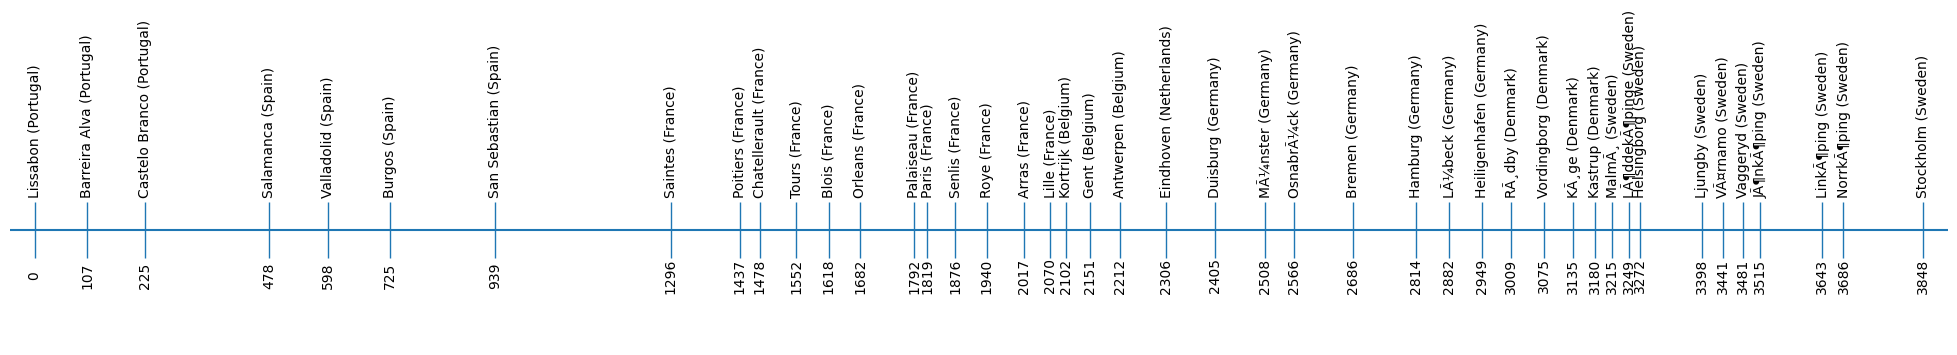

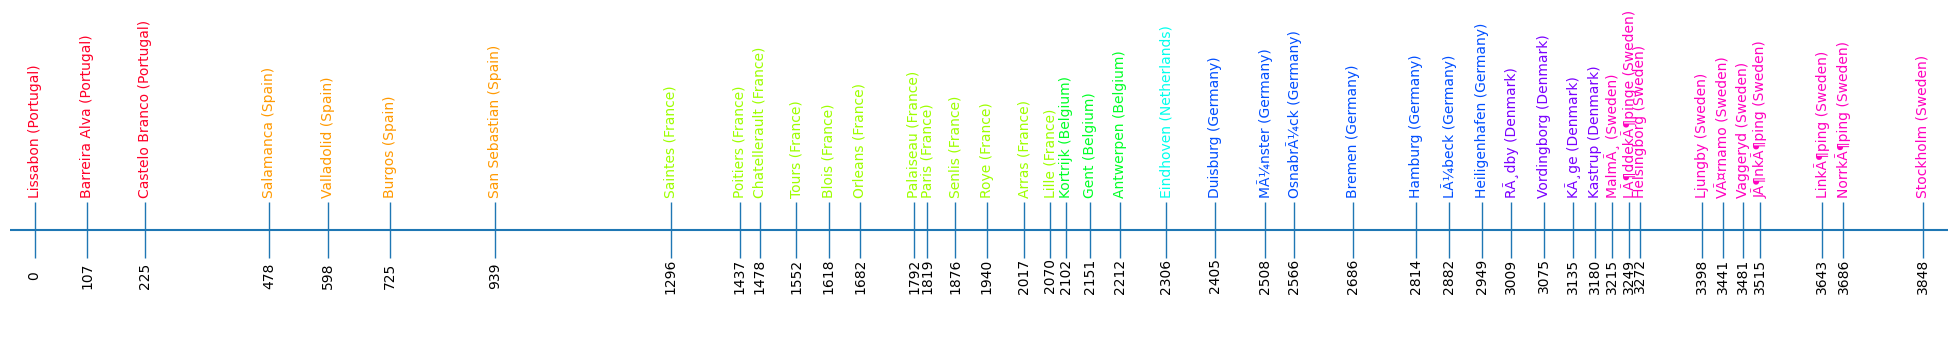

In [8]:
def plot_cities(clusters):
    """
        Function to plot partitioning of the cities.
    """
    d = distances[0]
    dmin = d.min() - 50
    dmax = d.max() + 50

    fig, ax = plt.subplots(figsize=(25,3))

    ax.hlines(1,dmin,dmax)  # Draw a horizontal line
    ax.set_xlim(dmin,dmax)
    ax.set_ylim(0.5,1.5)

    y = np.ones(np.shape(d))   # Make all y values the same
    ax.plot(d,y,'|',ms = 40)  # Plot a line at each location specified in a

    # uniques = np.unique()
    cmap = plt.get_cmap('gist_rainbow')
    uniques = np.unique(clusters)
    if len(uniques) == 1: cdict = dict.fromkeys(uniques, [0., 0., 0.])
    else: 
        cdict = {}
        for i, u in enumerate(uniques):
            cdict[u] = cmap(float(i) / (len(uniques)-1))
    
    for c, pos, cl in zip(cities, d, clusters):
        color = cdict[cl]
        ax.text(pos, 1.15, c, rotation=90, horizontalalignment='center', color=color)
        ax.text(pos, 0.80, "%.0f" % pos, rotation=90, verticalalignment='center', horizontalalignment='center', color=[0., 0., 0.])

    ax.axis('off')
    plt.show()

# Examples of how to plot clusters
# 1: Plot all clusters with same color.
plot_cities(np.zeros((len(cities),)))

# 2: Plot cities according to their country
countries = ["Portugal", "Spain", "France", "Belgium", "Netherlands", "Germany", "Denmark", "Sweden"]
country_dict = {s: i for i, s in enumerate(countries)}
# Extract country from city "name" and look up the cluster in the `country_dict`.
clusters = [country_dict[re.findall('\((\w+)\)', c)[0]] for c in cities]
 
plot_cities(clusters)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  2.  2.  2.  2.  2.  2.  2.]
 [ 0.  0.  0.  0.  0.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
   3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
   3.  3.  3.  3.  3.  3.  3.  3.]
 [ 0.  0.  0.  0.  0.  0.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
   4.  4.  

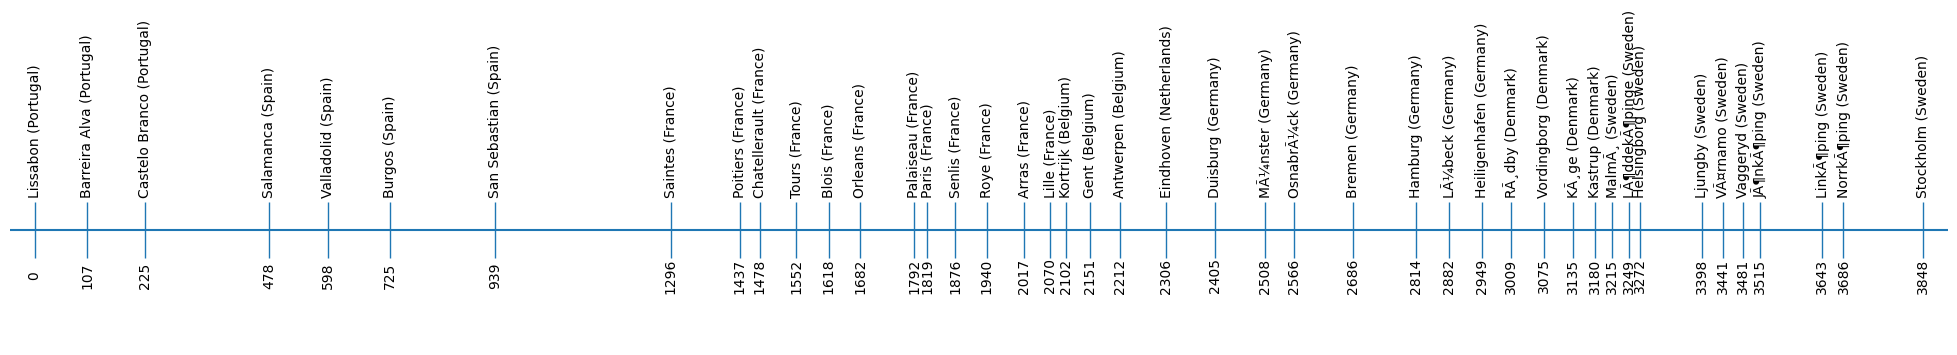

In [79]:
def sequence_segmentation(distances, k=3):
    clusters = np.zeros(distances.shape[0])

    ##YOUR CODE HERE
    k = len(clusters) // k
    A = np.zeros((k,len(clusters)))
    n = A.shape[1]

    pointers = np.zeros((k,n))
    for i in range(n):
        A[0,i] = distances[0,i]
    
    for i in range(k):
        A[i,i] = 0
    
    for s in range(1, k):
        for i in range(s+1, n):
            value = float('inf')
            index = -1
            for j in range(i):
                tmp = A[s - 1, j] + distances[j,i]
                if tmp < value:
                    value = tmp
                    index = j
            
            A[s,i] = value
            pointers[s,i] = index
            
            # values = [A[s - 1, j] + distances[j,i] for j in range(i)]
            # A[s, i] = min(values)
            # index = np.argmin(values)
            # A_idx[s, i] = index
    
    #print(A)
    print(pointers)
    return clusters

plot_cities(sequence_segmentation(distances, k=3))